In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

# 2. Least Square Line Fitting

## Visualize the data distribution

In [19]:
mat = loadmat("data_f_LSLF.mat")
data = mat['pts']
data = np.array(data)
data.shape

(2, 200)

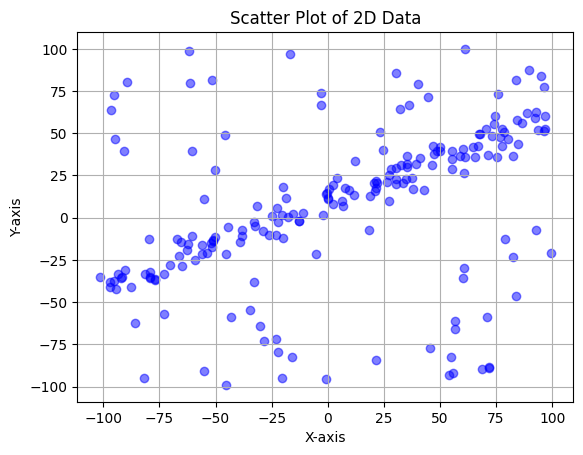

In [22]:
plt.scatter(data[0], data[1], c='blue', alpha=0.5)  # 'c' is the color, 'alpha' is transparency
plt.title('Scatter Plot of 2D Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

## Calculate the covariance matrix of the data and find its eigenvalues and eigenvectors. 

In [23]:
covariance = np.cov(data)
covariance

array([[3418.29090234, 1039.75748627],
       [1039.75748627, 2177.72593476]])

In [24]:
eigenvalues, eigenvectors = np.linalg.eig(covariance)

In [25]:
eigenvalues

array([4008.72968704, 1587.28715007])

In [44]:
eigenvectors

array([[ 0.86957598, -0.49379917],
       [ 0.49379917,  0.86957598]])

## Visualize geometric interpretation of the eigenvalues and eigenvectors

In [45]:
mean = np.mean(data, axis = 1)

In [121]:
scaled_eigenvectors = eigenvectors * eigenvalues.T
scaled_eigenvectors / 50

array([[ 69.7179007 , -15.67602153],
       [ 39.5901478 ,  27.60533549]])

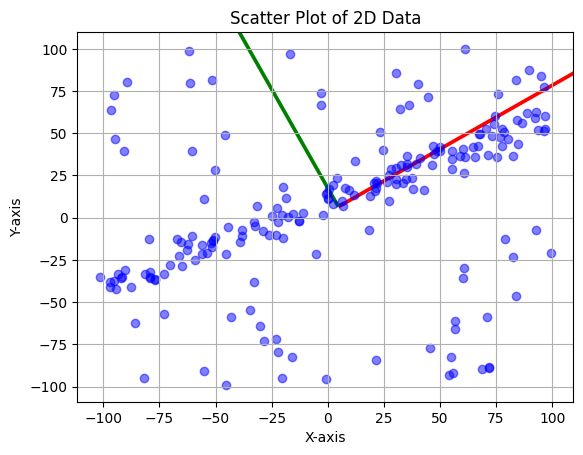

In [123]:
origin = np.array([mean, mean])  # Origin point for the vectors

plt.quiver([mean[0], mean[0]], [mean[1], mean[1]], scaled_eigenvectors[0], scaled_eigenvectors[1], color=['r', 'g'], scale = 1)

plt.scatter(data[0], data[1], c='blue', alpha=0.5)  # 'c' is the color, 'alpha' is transparency
plt.title('Scatter Plot of 2D Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

## Find the optimal line ax + by = 𝑑 that fits the data in the total least square sense

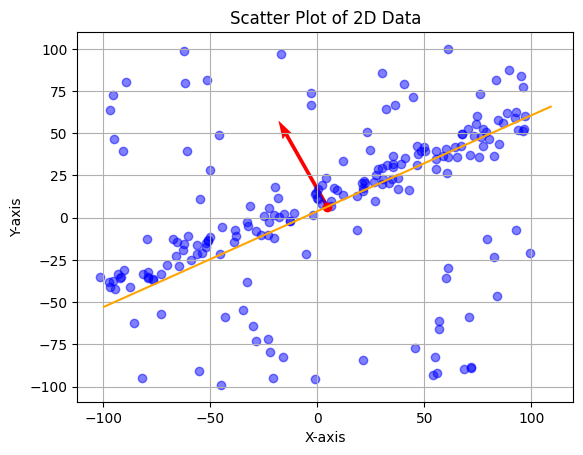

In [141]:
import numpy as np
import matplotlib.pyplot as plt

def plot_line(normal_vector, point_on_line):
    # Generate points along the line using the normal vector
    t = np.linspace(-120, 120, 10000)
    direction_vector = np.array([-normal_vector[1], normal_vector[0]])  # perpendicular direction
    line_points = np.outer(t, direction_vector) + point_on_line
    
    # Plot the line
    
    plt.quiver(point_on_line[0], point_on_line[1], normal_vector[0], normal_vector[1], color='red', scale=5, label='Normal Vector')
    
    plt.scatter(data[0], data[1], c='blue', alpha=0.5)  # 'c' is the color, 'alpha' is transparency
    plt.scatter(point_on_line[0], point_on_line[1], color='red', label='Point on Line')

    plt.plot(line_points[:, 0], line_points[:, 1], color='orange', label='Line')
    plt.title('Scatter Plot of 2D Data')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()

# Example inputs
normal_vector = np.array(eigenvectors[:, 1])  # Example normal vector (perpendicular to the line)
point_on_line = np.array(mean)  # Example point on the line

# Plot the line
plot_line(normal_vector, point_on_line)